# 1.python基础作业

1.1 type任意两个数值，输出float、int

In [12]:
type(1.2)

float

In [13]:
type(1)

int

1.2给a、b、c赋值，输出结果为12，并判断a与b是否相等

In [14]:
a = 1
b = 2
c = 9
print(a+b+c)
print(a==b)

12
False


1.3要求用户输入1到100之间数字并判断，输入符合要求,如果是1-100以内的数字，输出“100以内的数字”，否则输出“区间以外的数字”。最后打印结果为100以内的数字。

In [15]:
def test(a):
    if a < 100:
        print("100以内的数字")
    else:
        print("区间以外的数字")
test(20)

100以内的数字


1.4   python单行注释和多行注解分别用什么?


# 2 python进阶基础作业

2.1有四个数字：1、2、3、4，能组成多少个互不相同且无重复数字的三位数？各是多少？

In [16]:
l = [1,2,3,4]
n = 0
for i in l:
    for j in l:
        for k in l:
            if i!=j and j!=k and i!=k:
                n += 1
                print (i,j,k)
print("共有%d个三位数" %n)

1 2 3
1 2 4
1 3 2
1 3 4
1 4 2
1 4 3
2 1 3
2 1 4
2 3 1
2 3 4
2 4 1
2 4 3
3 1 2
3 1 4
3 2 1
3 2 4
3 4 1
3 4 2
4 1 2
4 1 3
4 2 1
4 2 3
4 3 1
4 3 2
共有24个三位数


2.2  a=[1, 2, 3, 4, 5], a[::2]=?, a[-2:] = ?

In [17]:
a = [1,2,3,4,5]
print(a[::2])
print(a[-2:])

[1, 3, 5]
[4, 5]


2.3 使用filter过滤[1,2,7,12,45,56,66]中的奇数，最后输出[2,12,56,66]

In [18]:
num = [1,2,7,12,45,56,66]
print(list(filter(lambda x: not x%2,num)))

[2, 12, 56, 66]


# 3. pandas数据处理作业

3.1 读取excel数据并进行抽样resample()

只保留data中的open，获取data的数据类型与后5个值：

In [19]:
import pandas as pd
import numpy as np

In [20]:
S1 = pd.read_excel('sz50.xlsx',sheetname=0,index_col='datetime').open
S1[-5:]

datetime
2017-11-14 15:00:00    119.62
2017-11-15 15:00:00    117.84
2017-11-16 15:00:00    117.75
2017-11-17 15:00:00    116.25
2017-11-20 15:00:00    118.97
Name: open, dtype: float64

3.2 表示在【0-31】这32个数字中分成8行4列  

In [21]:
arr1 = np.arange(32).reshape(8,4)
arr1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

3.3 将第5个到第7个改为12  
arr=np.arange(10)  最后输出结果为[ 0  1  2  3  4 12 12 12  8  9]

In [22]:
arr2 = np.arange(10)
arr2[5:8] = 12
arr2

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

3.4如何方便的计算两个时间的差，如两个时间相差几天，几小时等，写出代码，列出式子

In [23]:
from datetime import datetime,timedelta
def timediff(time1,time2):
    return time1-time2
t1 = datetime.now()
t2 = datetime(1990,1,1,0,0,0)
timediff(t1,t2).days

10510

# 4.数据计算与统计作业

4.1 计算股票600104、600518的协方差

In [24]:
Stock1 = pd.read_excel('sz50.xlsx',sheetname='600104.XSHG',index_col='datetime')
Stock2 = pd.read_excel('sz50.xlsx',sheetname='600518.XSHG',index_col='datetime')

In [25]:
five_day_df = pd.concat([Stock1.close.pct_change(5),Stock2.close.pct_change(5)],keys=['stock1','stock2'],axis=1)

In [26]:
print(five_day_df.tail())

                       stock1    stock2
datetime                               
2017-11-14 15:00:00  0.043045  0.002651
2017-11-15 15:00:00  0.036337  0.024635
2017-11-16 15:00:00  0.024782  0.037083
2017-11-17 15:00:00  0.023714  0.058516
2017-11-20 15:00:00  0.018449  0.060852


In [27]:
print(five_day_df.cov())

          stock1    stock2
stock1  0.000820  0.000245
stock2  0.000245  0.000599


4.2 投一个骰子，1\6概率为6，投了6次，重复60轮，平均每轮骰子为6的次数时多少？

In [28]:
import numpy as np
import matplotlib.pyplot as plt
num_sucess = np.random.binomial(6,1/6,size=[60])
avg = num_sucess.mean()
print("平均每轮骰子为6的次数为：",avg)

平均每轮骰子为6的次数为： 1.0


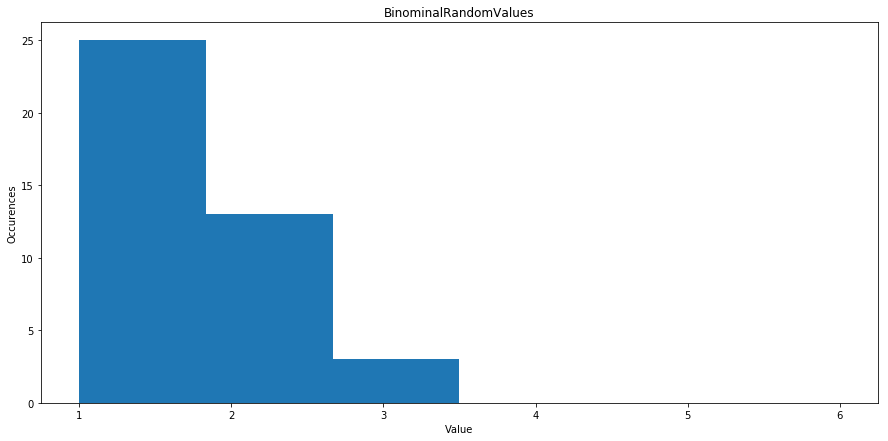

In [29]:
plt.figure(figsize=(15, 7))
plt.hist(num_sucess,bins=6,range=[1,6],)
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.title('BinominalRandomValues')
plt.show()

4.3 读取股票600030数据，并利用talib模块，制作CCI的绘图，周期默认为10

In [32]:
import talib as ta
Stock = pd.read_excel('sz50.xlsx',sheetname='600030.XSHG',index_col='datetime')
cci = ta.CCI(Stock.high,Stock.low,Stock.close,timeperiod=10)

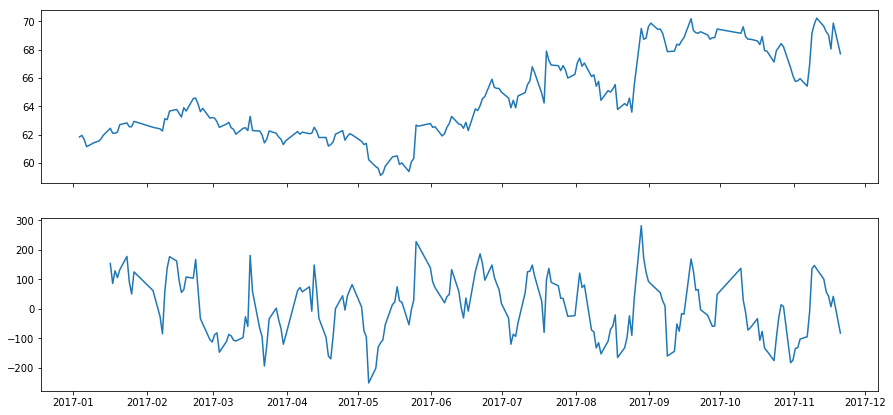

In [33]:
fig, (ax, ax1) = plt.subplots(2, 1, sharex=True, figsize=(15,7))
ax.plot(Stock.close)
ax1.plot(cci)
plt.show()

#  5.爬虫作业

1.在图灵机器人注册账号并申请APIKEY，放入指定位置并运作课件成功

2.自己查看自己的请求头，复制出来user–agent部分，放入请求douban的请求头中

3.阅读菜鸟教程熟悉re库

4.在大鱼官网注册账号密码，在课件中指定位置输入，并运行课件成功

最后提交代码运行结果